In [20]:
# Cell 1 — basic imports & warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# optional: to save model
import joblib


In [21]:
# Cell 2 — load dataset (robustly drop any unwanted columns)
url = "https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv"
df = pd.read_csv(url)

# show top rows & basic info
display(df.head())
df.info()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
# Cell 3 — remove any columns that are present but empty / unwanted
# use errors='ignore' so it won't crash if column doesn't exist
df = df.drop(columns=["Unnamed: 32", "id"], errors='ignore')

# Quick check
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
display(df.head(3))


Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Diagnosis unique values: ['M' 'B']
diagnosis
B    357
M    212
Name: count, dtype: int64


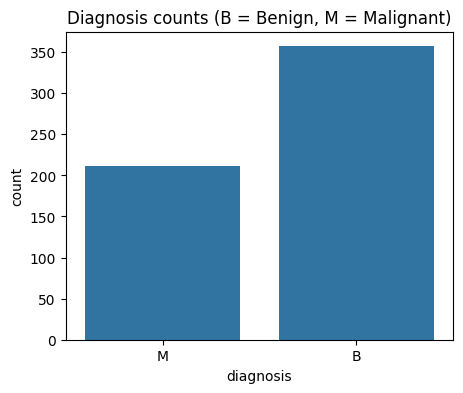

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
# Cell 4 — basic EDA: unique values, counts, describe, and distribution of diagnosis
print("Diagnosis unique values:", df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

# prettier countplot
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis counts (B = Benign, M = Malignant)')
plt.show()

# numeric summary
display(df.describe())


In [24]:
# Cell 5 — create feature groups (if you want to use them later)
cols = list(df.columns)
# assuming first column is 'diagnosis' and rest numeric features; adjust indices if different
features_mean = cols[1:11]
features_se = cols[11:21]
features_worst = cols[21:]
print("mean features:", features_mean)
print("se features:", features_se)
print("worst features:", features_worst)


mean features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se features: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst features: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [25]:
# Cell 6 — map diagnosis to numeric and prepare X, y
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# final check
display(X.head())
print("X shape:", X.shape, "y shape:", y.shape)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


X shape: (569, 30) y shape: (569,)


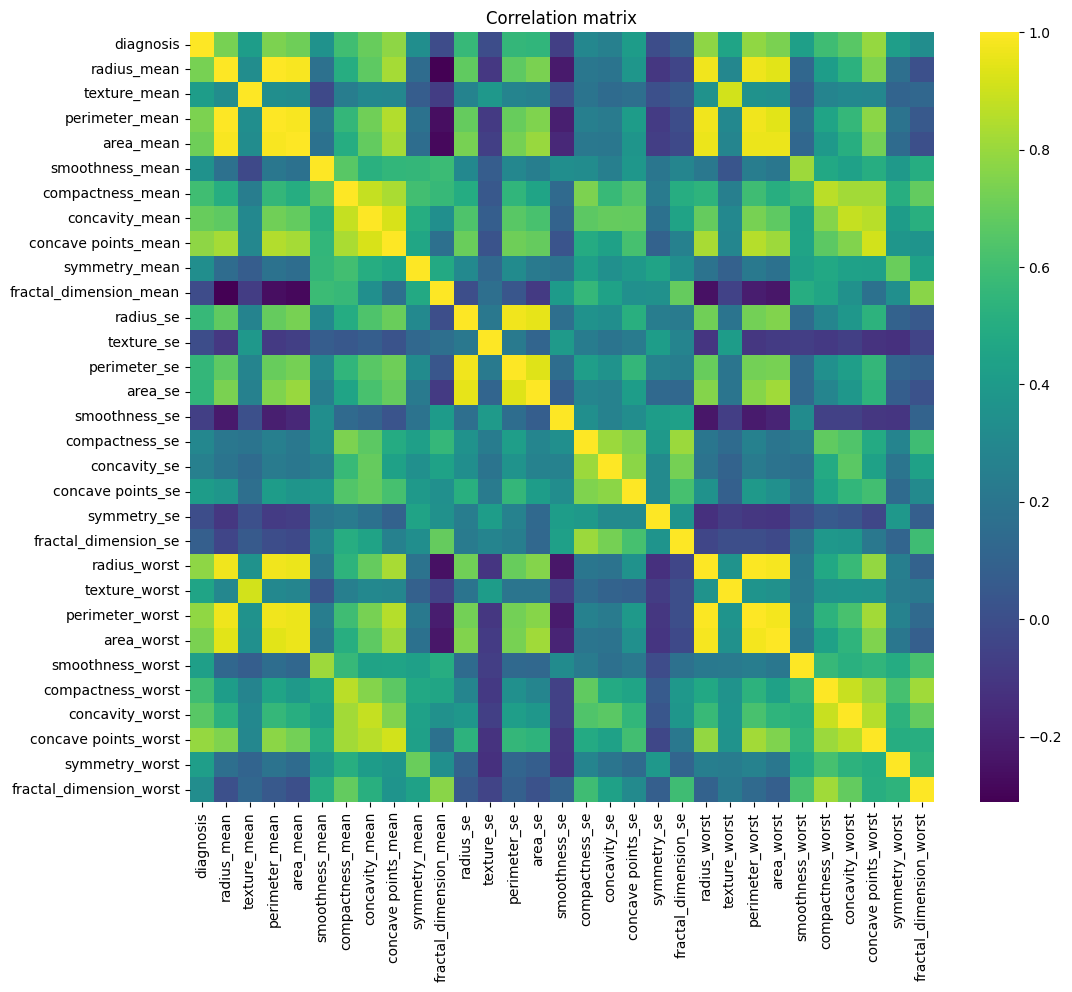

In [26]:
# Cell 7 — correlation heatmap (optional but useful)
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=False)
plt.title("Correlation matrix")
plt.show()


In [27]:
# Cell 8 — train/test split and scaling
# use stratify=y to keep class distribution same in train/test and random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (398, 30)
X_test shape: (171, 30)


In [28]:
# Cell 9 — prepare results table
results = pd.DataFrame(columns=['Algorithm', 'Accuracy'])


In [31]:
# Cell 10 — Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", lr_acc)

# Correct way to add rows in pandas 2.x
results = pd.concat([
    results,
    pd.DataFrame({'Algorithm': ['Logistic Regression'], 'Accuracy': [lr_acc]})
], ignore_index=True)

# optional: show classification report
print(classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion matrix:
 [[106   1]
 [  4  60]]


In [33]:
# Cell 11 — Decision Tree (minimal change)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy:", dtc_acc)

# replace append() with pd.concat()
results = pd.concat([
    results,
    pd.DataFrame({'Algorithm': ['Decision Tree'], 'Accuracy': [dtc_acc]})
], ignore_index=True)

print(classification_report(y_test, y_pred_dt))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree accuracy: 0.9005847953216374
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       107
           1       0.89      0.84      0.86        64

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

Confusion matrix:
 [[100   7]
 [ 10  54]]


In [35]:
# Cell 12 — Random Forest (minimal fix using pd.concat)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", rfc_acc)

# replace append() with pd.concat()
results = pd.concat([
    results,
    pd.DataFrame({'Algorithm': ['Random Forest'], 'Accuracy': [rfc_acc]})
], ignore_index=True)

print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

Confusion matrix:
 [[107   0]
 [  6  58]]


In [37]:
# Cell 13 — SVM (fixed)
svc = svm.SVC(kernel='rbf', probability=False, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print("SVM accuracy:", svc_acc)

# FIX: replace append() with pd.concat()
results = pd.concat([
    results,
    pd.DataFrame({'Algorithm': ['SVM'], 'Accuracy': [svc_acc]})
], ignore_index=True)

print(classification_report(y_test, y_pred_svc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svc))


SVM accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion matrix:
 [[107   0]
 [  7  57]]


In [38]:
# Cell 14 — show results comparison
results = results[['Algorithm', 'Accuracy']].sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(results)


,Algorithm,Accuracy
0,Logistic Regression,0.970760
1,Random Forest,0.964912
2,SVM,0.959064
3,Decision Tree,0.900585


In [39]:
# Cell 15 — (Optional) Save best model to disk
# pick best model by accuracy
best_idx = results['Accuracy'].idxmax()
best_algo = results.loc[best_idx, 'Algorithm']
print("Best algorithm:", best_algo)

# map name to object
model_map = {'Logistic Regression': lr, 'Decision Tree': dtc, 'Random Forest': rfc, 'SVM': svc}
best_model = model_map[best_algo]
joblib.dump(best_model, 'best_model.joblib')
print("Saved best model to best_model.joblib")


Best algorithm: Logistic Regression
Saved best model to best_model.joblib
